In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import importlib
# import ising_analysis
# importlib.reload(ising_analysis)

In [2]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#3cb371']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE']

### Ising Model with Next-Nearest-Neighbor (NNN) Interaction

Via Metropolis sampling and Convolutional RBM (CRBM) with Gibbs sampling, we will try to simulate the Ising Model with NNN and NN interactions in two dimensions:
$$
H = J_1 \sum_{\langle i,j \rangle} s_i s_j + J_2 \sum_{\langle \langle i,j \rangle \rangle} s_i s_j
$$
where $J_1 > 0$, $J_2 \geq 0$, $s_i = \pm 1$, $\langle i,j \rangle$ denotes nearest-neighbor sites, and $\langle \langle i,j \rangle \rangle$ denotes NNN sites.

### References

https://journals.aps.org/prb/abstract/10.1103/PhysRevB.76.064528

https://journals.aps.org/prb/abstract/10.1103/PhysRevB.79.014439

https://journals.aps.org/prb/abstract/10.1103/PhysRevB.84.174407

https://journals.aps.org/prb/pdf/10.1103/PhysRevB.45.7832

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.63.2148

https://aip.scitation.org/doi/10.1063/1.1664978

### Load data

In [3]:
throwaway = 10000

In [4]:
L = 16
T = 1.0
J1 = -1.0
J2 = 0.0

In [5]:
data_correlated_MC = np.loadtxt("./data_nnn/L_"+str(L)+"_T_"+str(T)+"_J1_"+str(J1)+"_J2_"+str(J2)+"_seed_1968.dat")[throwaway:]
data_correlated_CRBM = np.loadtxt("./data_nnn/L_"+str(L)+"_T_"+str(T)+"_J1_"+str(J1)+"_J2_"+str(J2)+"_kernelDims_1-2_no_symmetries.dat")[throwaway:]

In [6]:
E_correlated_MC = data_correlated_MC[:,0]
M_correlated_MC = data_correlated_MC[:,1]

E_correlated_CRBM = data_correlated_CRBM[:,0]
M_correlated_CRBM = data_correlated_CRBM[:,1]

### Energy in MC vs CRBM

In [7]:
num_samples_MC = data_correlated_MC.shape[0]
num_samples_CRBM = data_correlated_CRBM.shape[0]

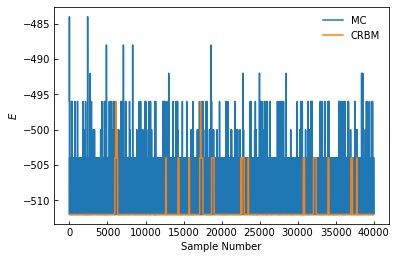

In [8]:
plt.plot(np.arange(num_samples_MC),E_correlated_MC,color="tab:blue",alpha=1.0,label="MC")
plt.plot(np.arange(num_samples_CRBM),E_correlated_CRBM,color="tab:orange",alpha=1.0,label="CRBM")
plt.ylabel(r"$E$")
plt.xlabel(r"Sample Number")
plt.tick_params(direction="in")
plt.legend(frameon=False)

In [9]:
np.mean(E_correlated_MC)/L**2,np.mean(E_correlated_CRBM)/L**2

(-1.99719375, -1.997817578125)

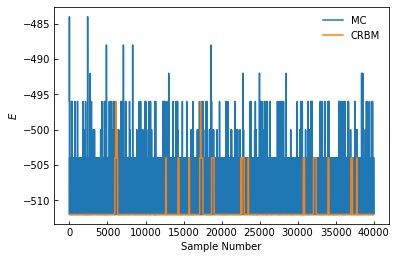

In [11]:
plt.plot(np.arange(num_samples_MC),E_correlated_MC,color="tab:blue",alpha=1.0,label="MC")
plt.plot(np.arange(num_samples_CRBM),E_correlated_CRBM,color="tab:orange",alpha=1.0,label="CRBM")
plt.ylabel(r"$E$")
plt.xlabel(r"Sample Number")
plt.tick_params(direction="in")
plt.legend(frameon=False)

In [10]:
np.mean(M_correlated_MC)/L**2,np.mean(M_correlated_CRBM)/L**2

(0.9992876953125, 0.9994533203125)